# GEOG5995M Final Assignment [Jupyter Notebook] - UK Refugee Resettlement Visualisations to Support the Safe and Legal Routes Cap Consultation

Student ID number: 201786466

I begin by reading in the packages I will need for this project. Pandas is used to read in xlsx format data and to format it as a dataframe. Geopandas is the sibling of the pandas package which allows me to read in, process and create visualisations with spatial data. Matplot and seaborn will assist me with the plotting of data. If you are using Anaconda, you will need to add geopandas to your working envivronment using conda prompt. This pacakge is not installed by default. You can install geopandas using the file spatial_environment.yml from the zip folder.

In [1]:
# read in required packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

I will start by creating my non-spatial visualisation summarising data retrieved from Gov.uk on local authority (LA) vacant dwellings[1]. First I read in the data using pandas. You will find this dataset and all other datasets I use for this assignment (excluding the shp file which was too large) in the file you downloaded from my GitHub repository: https://github.com/POBrocklehurst1/201786466

Please make sure you change the file directory address below to the place where you have saved the datasets

In [3]:
#using Pandas, read in the vacant dwellings by local authority dataset retrieved from the .GOV.uk website
vacancies = pd.read_excel("User/Documents/Data/All_vacants_2023.xlsx")

I use the head() and tail() method to get a visual sense of what the dataset looks like and how the data is structured

In [5]:
vacancies.head()

,Current\nONS code,Lower and Single Tier Authority Data,All_vacants
0,E07000157,Alnwick,NaN
1,E07000158,Berwick-upon-Tweed,NaN
2,E07000159,Blyth Valley,NaN
3,E07000160,Castle Morpeth,NaN
4,E07000054,Chester-le-Street,NaN


In [6]:
vacancies.tail()

,Current\nONS code,Lower and Single Tier Authority Data,All_vacants
371,E07000052,West Dorset,NaN
372,E07000191,West Somerset,NaN
373,E07000233,West Wiltshire,NaN
374,E07000053,Weymouth and Portland,NaN
375,E06000054,Wiltshire,6204.0


The info() method tells me a little more about the dataset.

In [7]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Current
ONS code                      376 non-null    object 
 1   Lower and Single Tier Authority Data  376 non-null    object 
 2   All_vacants                           296 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.9+ KB


I can see that my dataset contains 375 rows (excluding the column headers row). The data types for my variables are 'object' and 'float' which are suitable for my purposes. The column titled 'LA' gives the recognisable name of each LA in the UK and the 'All_vacants' column gives the total number of vacant dwellings each LA was estimated to have as of 2023. The ONS code is not needed so I will drop it sortly. I can also see that 'All_vacants' has 296 non-null entries, meaning 80 were blank. This is because estimates were not provided for some UK LAs. These blanks are not a problem for my purposes, however, to demonstrate an element of data cleaning, i.e., dropping blank rows, I will tidy up this dataset by droppping the blank LAs as well.

In [8]:
vacancies.drop('Current\nONS code', axis=1, inplace=True)
vacancies.dropna(inplace=True)
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 5 to 375
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Lower and Single Tier Authority Data  296 non-null    object 
 1   All_vacants                           296 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


I now have 296 non-blank LA rows. Government published datasets tend to be rigorously quality assurred, meaning the chance of input errors is low. However, to be safe, I will check that there are no duplicate LAs in the dataset to avoid double counting using the duplicated() method. I create a column containing all rows where duplicated returns the boolean 'True' and then print it.

In [9]:
duplicates = vacancies['Lower and Single Tier Authority Data'].duplicated()==True
print(vacancies[duplicates])

Empty DataFrame
Columns: [Lower and Single Tier Authority Data, All_vacants]
Index: []


The above tells me that I have 296 unique LA rows.

A quick glance at the head and tail using the describe attribute also shows me that the unwanted column and rows have been removed.

In [10]:
vacancies.describe

<bound method NDFrame.describe of     Lower and Single Tier Authority Data  All_vacants
5                          County Durham       9134.0
6                             Darlington       1765.0
10                             Gateshead       3162.0
11                            Hartlepool       1801.0
12                         Middlesbrough       2819.0
..                                   ...          ...
367                           Tewkesbury       1152.0
368                               Torbay       2834.0
369                             Torridge        855.0
370                           West Devon        643.0
375                            Wiltshire       6204.0

[296 rows x 2 columns]>

To assist stakeholders with decision-making, I want to visualise some key summary statistics for this data. First lets generate the statistics I could visualise using the describe() method.

In [11]:
vacancies.describe()

,All_vacants
count,296.000000
mean,2361.912162
std,1770.663252
min,44.000000
25%,1318.000000
50%,1792.500000
75%,2853.750000
max,13400.000000


It appears that the mean of this data is being skewed by larger LAs. To get a visual sense of this I will plot a histogram using seaborn and matplotlib.pyplot.

<Figure size 200x200 with 0 Axes>

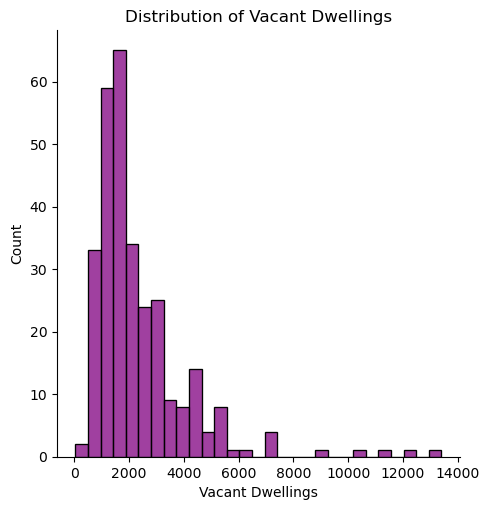

In [12]:
plt.figure(figsize=(2,2))
sns.displot(x='All_vacants', color='purple', data=vacancies).set(xlabel='Vacant Dwellings', title='Distribution of Vacant Dwellings');
plt.show()

My suspicion appears to be true. However, this is not a problem, as my choice of non-spatial visualisation will be a boxplot, which charts the median, i.e., the 50% percentile, and also makes users aware of the existence of larger LAs and the min and max poles of the data. Let's plot it with a title and tidier x axis label. I set the 'x' argument to my column 'All_vacants' so that the boxplot appears along the x axsis which I think looks neater and doesn't take up too much space.

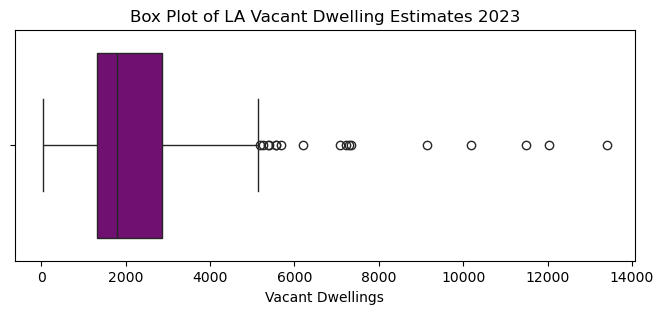

In [13]:
#Set figure size
plt.figure(figsize=(8,3))
#specify the type of plot and what I want to plot as well as my prefered title, x axis title and colour
sns.boxplot(x='All_vacants', color='purple', data=vacancies).set(title='Box Plot of LA Vacant Dwelling Estimates 2023', xlabel='Vacant Dwellings');

plt.show()

Next, I will generate my spatial plot. To do so, I start by reading in a dataset retrieved from the UK Home Office website[2]. The dataset contains the Local Authority District (LAD) code used to identify each LA district and the total refugees resettled from 2014 to 2023 in each LA in the 'RESETTLED' column. To prepare this dataset for analysis, I have also included an estimate of UK population by LA in the LA_POP column which I retrieved from the ONS website[3] and calculated the number of resettled refugees from 2014 to 2023 as a proportion of the estimated total population of each LA in 2021 in the 'BY_POP' column.

In [14]:
#read in the Resettled_2014-23 dataset
resettled_data = pd.read_excel("User/Documents/Data/Resettled_2014-23.xlsx")

#sense check the first 5 rows
resettled_data.head()

,LA,LAD,RESETTLED,LA_POP,BY_POP
0,Hartlepool,E06000001,271,92571.0,0.0029
1,Middlesbrough,E06000002,83,143734.0,0.0006
2,Redcar and Cleveland,E06000003,388,136616.0,0.0028
3,Stockton-on-Tees,E06000004,55,197030.0,0.0003
4,Darlington,E06000005,75,108222.0,0.0007


Before, I start my spatial visualisation, let us just doublecheck my prior assumption that those LAs with a greater stock of vacant dwellings will be those who have resettled a greater number of refugees since 2014 and, therefore, LAs tend to resettle their relative fair share. I will do this by visualising the relationship using a scatter plot with a linear trend line. However, first, I will need to join the vacancies dataset to the resettled dataset. To do so, I change the column title in the vacancies dataset to match the title in the resettled_data dataset.

In [15]:
vacancies.rename(columns={"Lower and Single Tier Authority Data": "LA"}, inplace=True)
resettled_vacant  = pd.merge(vacancies, resettled_data,  on='LA',  how='left')
resettled_vacant.head()

,LA,All_vacants,LAD,RESETTLED,LA_POP,BY_POP
0,County Durham,9134.0,E06000047,359.0,521346.0,0.0007
1,Darlington,1765.0,E06000005,75.0,108222.0,0.0007
2,Gateshead,3162.0,E08000037,564.0,196154.0,0.0029
3,Hartlepool,1801.0,E06000001,271.0,92571.0,0.0029
4,Middlesbrough,2819.0,E06000002,83.0,143734.0,0.0006


I use seaborn's lmplot() method for my visualisation

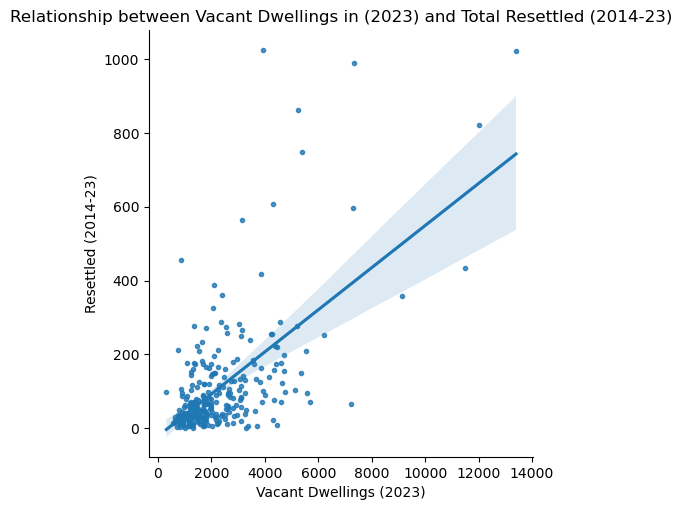

In [16]:
sns.lmplot(x="All_vacants", y="RESETTLED", data=resettled_vacant, markers='.').set(title='Relationship between Vacant Dwellings in (2023) and Total Resettled (2014-23)', xlabel='Vacant Dwellings (2023)', ylabel='Resettled (2014-23)');

The scatterplot appears to confirm my assumption as the trendline shows a strong positive correlation with not too much variance from the treadline, although there is certainly some hetroskedasticity to bear in mind. If I had more time, I would include an r squared value in this visualisation that would allow for a more statistically rigorous assessment of the assumed positive correlation

Now I can begin creating my spatial visualisation. To do this, I will need a shp file of the UK broken down into local authority areas as of 2023. The shp file I have used comes from the ONS Open Geography Portal[4]. Let's read in the shp file and take a look at it's coordinate reference system.

In [17]:
LA_shape = gpd.read_file("User/Documents/Data/LAD_MAY_2023_UK_BFC_V2.shp")
print(LA_shape.crs)

EPSG:27700


The CRS code shown is the projected coordinate system for the UK. So I have the right file with the right CRS.

To join my spatial to my non-spatial dataset, I will need a column key. The key in this case is the local authority district code as of 2023 (LAD23CD). This is titled LAD in my non-spatial data file so I will need to rename it to match the column title in my spatial dataframe using the rename() method. Once renamed, I can execute a join using the pandas merge() method.

In [18]:
resettled_data.rename(columns={"LAD": "LAD23CD"}, inplace=True)

resettled  = pd.merge(LA_shape, resettled_data,  on='LAD23CD',  how='left')
resettled.head()

,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LA,RESETTLED,LA_POP,BY_POP
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,96097790-e4d1-4200-8ce7-17de53d58fca,"MULTIPOLYGON (((450154.599 525938.201, 450140....",Hartlepool,271.0,92571.0,0.0029
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,43ccae4f-588f-4f71-b28f-905ae3e9426a,"MULTIPOLYGON (((446854.700 517192.700, 446854....",Middlesbrough,83.0,143734.0,0.0006
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,c215a44f-108d-4394-bb75-b3ffc6c6e9d1,"MULTIPOLYGON (((451747.397 520561.100, 451792....",Redcar and Cleveland,388.0,136616.0,0.0028
3,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.5569,068e44f0-67d0-4abe-bd0b-db83d71967c0,"MULTIPOLYGON (((447177.704 517811.797, 447176....",Stockton-on-Tees,55.0,197030.0,0.0003
4,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,d70fe212-e702-4186-a861-e4d9f80395f8,"POLYGON ((423496.602 524724.299, 423497.204 52...",Darlington,75.0,108222.0,0.0007


Now I have one file containing my variables of interest, each with their own spatial geometry description. With this dataset I can use geopandas to plot the number of resettled refugees (2014-23) over each UK LA. However, before I do, let's check that there are no blanks in the dataset

In [19]:
resettled.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LAD23CD    361 non-null    object  
 1   LAD23NM    361 non-null    object  
 2   LAD23NMW   22 non-null     object  
 3   BNG_E      361 non-null    int64   
 4   BNG_N      361 non-null    int64   
 5   LONG       361 non-null    float64 
 6   LAT        361 non-null    float64 
 7   GlobalID   361 non-null    object  
 8   geometry   361 non-null    geometry
 9   LA         283 non-null    object  
 10  RESETTLED  352 non-null    float64 
 11  LA_POP     348 non-null    float64 
 12  BY_POP     348 non-null    float64 
dtypes: float64(5), geometry(1), int64(2), object(5)
memory usage: 36.8+ KB


While luckily there are no blanks for the spatial geomerty column, unfortunately, it appears that data on the count of refugees resettled is missing for 9 LAs. Let's have a look which ones these are using loc[] filtering for the condition that the value is null using isnull()

In [20]:
resettled.loc[resettled['BY_POP'].isnull()]

,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LA,RESETTLED,LA_POP,BY_POP
49,E06000053,Isles of Scilly,None,91327,11447,-6.302170,49.9233,9d80c63e-9163-44e8-ac17-7e4cc8b35980,"MULTIPOLYGON (((83962.840 5401.150, 83970.680 ...",NaN,NaN,NaN,NaN
59,E06000063,Cumberland,None,315777,533120,-3.307970,54.6861,edad0ea5-8e2f-4d2b-a258-396b48a0d936,"MULTIPOLYGON (((318182.570 480704.570, 318181....",NaN,25.0,NaN,NaN
60,E06000064,Westmorland and Furness,None,353889,510941,-2.713360,54.4917,6cce0dba-2255-4bde-beba-b5324455d288,"MULTIPOLYGON (((321485.903 463795.299, 321473....",NaN,10.0,NaN,NaN
61,E06000065,North Yorkshire,None,429509,466515,-1.550320,54.0937,62e8d08c-f630-485d-9f3c-eb9a3ec3b81d,"MULTIPOLYGON (((465379.797 444094.799, 465436....",NaN,57.0,NaN,NaN
62,E06000066,Somerset,None,309295,131077,-3.296020,51.0718,1e5f20ee-394f-4349-a889-269d23578946,"MULTIPOLYGON (((329345.740 147867.049, 329353....",NaN,9.0,NaN,NaN
64,E07000009,East Cambridgeshire,None,555576,275765,0.283149,52.3579,d87ed7d3-320e-48f1-8467-ad5f1cdf9740,"MULTIPOLYGON (((552086.798 292395.602, 552193....",NaN,NaN,NaN,NaN
92,E07000069,Castle Point,None,579490,187920,0.588084,51.5616,abeda397-79d3-4a86-8675-503c5f57e6c0,"MULTIPOLYGON (((575243.901 182846.800, 575246....",NaN,NaN,NaN,NaN
118,E07000095,Broxbourne,None,534742,204251,-0.050730,51.7208,097cbca8-e7a2-4ca2-b118-802b68914da6,"POLYGON ((537127.503 210970.200, 537127.701 21...",NaN,NaN,NaN,NaN
155,E07000136,Boston,None,526851,343953,-0.112180,52.9779,864444c5-fdea-4242-a1bf-32db4cb80886,"MULTIPOLYGON (((532220.199 332350.595, 532362....",NaN,NaN,NaN,NaN
161,E07000142,West Lindsey,None,499314,390326,-0.507740,53.4004,ef2c72e4-aeca-485e-a957-bdd52171b4f7,"MULTIPOLYGON (((481535.500 387609.297, 481532....",NaN,NaN,NaN,NaN


Fortunately, there are only 9. I will remember to enter a caveat under my spatial visualisation mentioning that these LAs are not graphed due to missing data so that users do not mistake the white colour shown for missing LAs as suggesting that a very low number of refugees were resettled in the area. I will also do this for the 12 LAs for which 'BY_POP' is blank when I come to graphing this column as well. Let's have a first attempt at graphing the first element of my spatial visualisation.

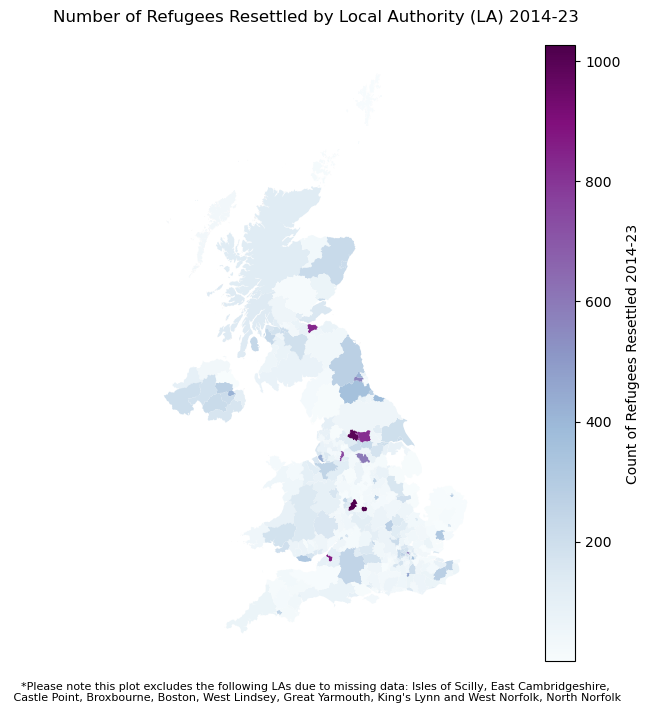

In [21]:
#Set the plot size and number of subplots
f,ax = plt.subplots(1, figsize=(16,8))

#Specify what I want plotting and customise with a legend title and an appropriate colour map
resettled.plot('RESETTLED', legend=True, ax=ax, legend_kwds={'label': "Count of Refugees Resettled 2014-23"}, cmap='BuPu')

#Make axis invisible for subplot
ax.set_axis_off()

#Set my title
ax.set_title('Number of Refugees Resettled by Local Authority (LA) 2014-23')

#Add a caveat for the missing LAs below the chart
plt.text(0.5, -0.05, "*Please note this plot excludes the following LAs due to missing data: Isles of Scilly, East Cambridgeshire,\n Castle Point, Broxbourne, Boston, West Lindsey, Great Yarmouth, King's Lynn and West Norfolk, North Norfolk"
         , ha='center', va='center', transform=plt.gca().transAxes, fontsize=8, wrap=True)

plt.show()

The above constitutes a decent first attempt, however, the lack of boundary lines make it difficult to distinguish between LA areas. I can fix this using the edgecolor argument.

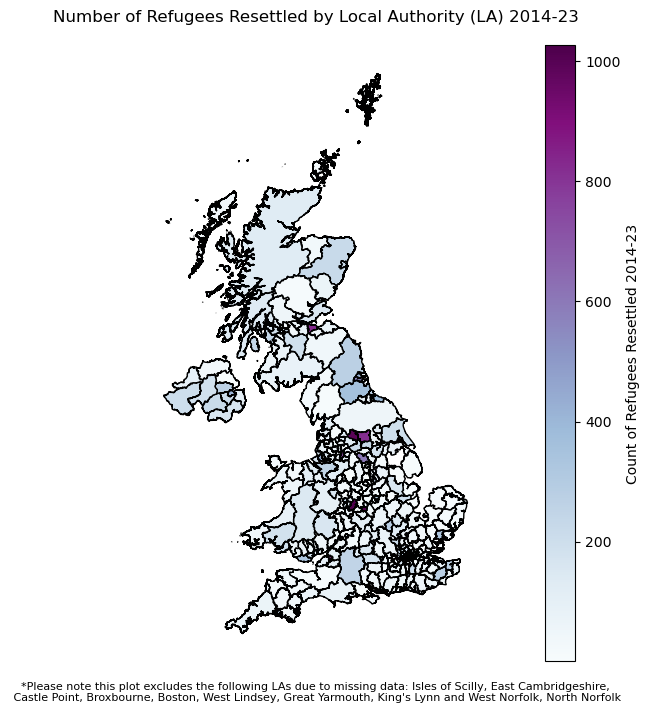

In [22]:
f,ax = plt.subplots(1, figsize=(16,8))

#Same as before but with the edgecolor argument added in
resettled.plot('RESETTLED', legend=True, ax=ax, edgecolor='black', legend_kwds={'label': "Count of Refugees Resettled 2014-23"}, cmap='BuPu')

ax.set_axis_off()

ax.set_title('Number of Refugees Resettled by Local Authority (LA) 2014-23')

plt.text(0.5, -0.05, "*Please note this plot excludes the following LAs due to missing data: Isles of Scilly, East Cambridgeshire,\n Castle Point, Broxbourne, Boston, West Lindsey, Great Yarmouth, King's Lynn and West Norfolk, North Norfolk"
         , ha='center', va='center', transform=plt.gca().transAxes, fontsize=8, wrap=True)

plt.show()

That's a little better. However, the size of the plot makes the line width look a little too thick, also making it difficult to distinguish the various LA areas and is less asthetically pleasing than it could be. I can fix this by customising the line width as below.

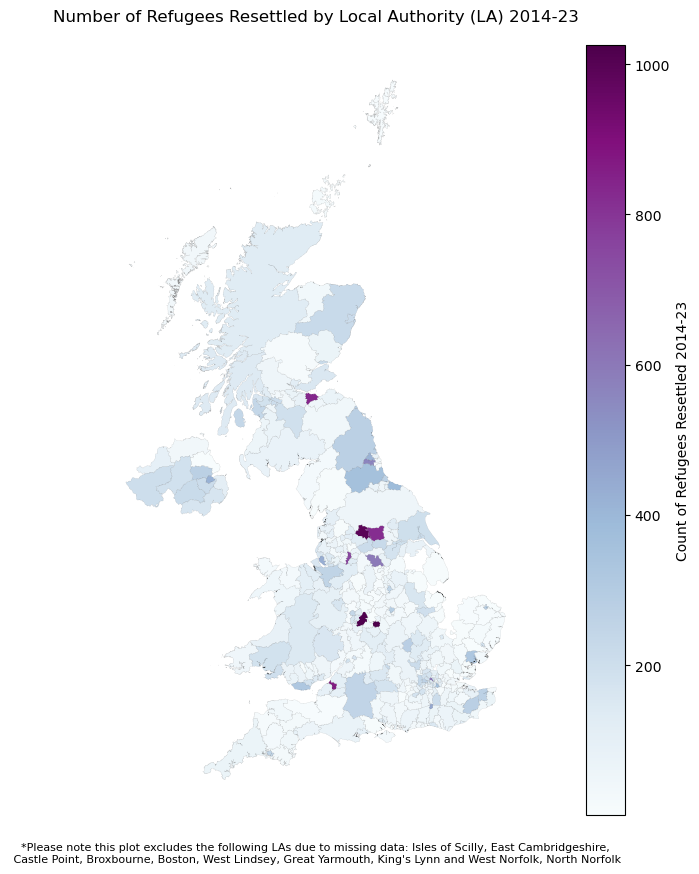

In [25]:
f,ax = plt.subplots(1, figsize=(16,10))

#Same as before but with the edgecolor's linewidth scaled down
resettled.plot('RESETTLED', legend=True, ax=ax, edgecolor='black', legend_kwds={'label': "Count of Refugees Resettled 2014-23"}, cmap='BuPu', linewidth=0.03)

ax.set_axis_off()

ax.set_title('Number of Refugees Resettled by Local Authority (LA) 2014-23')

plt.text(0.5, -0.05, "*Please note this plot excludes the following LAs due to missing data: Isles of Scilly, East Cambridgeshire,\n Castle Point, Broxbourne, Boston, West Lindsey, Great Yarmouth, King's Lynn and West Norfolk, North Norfolk"
         , ha='center', va='center', transform=plt.gca().transAxes, fontsize=8, wrap=True)

plt.show()

Much better! Next, let's plot the number of resettled refugees as a proportion of the estimated LA population in 2023. That way we have both a spatial visulisation of the number of resettled refugees by LA area and also the same as a proportion of the estimated population in the LA. Considering the number of resettled refugees as a percentage of the total popoulation gives a fairer perspective on the number of people resettled in each area, as it accounts for the fact that some LAs are larger in space, vacant dwellings capacity and population.

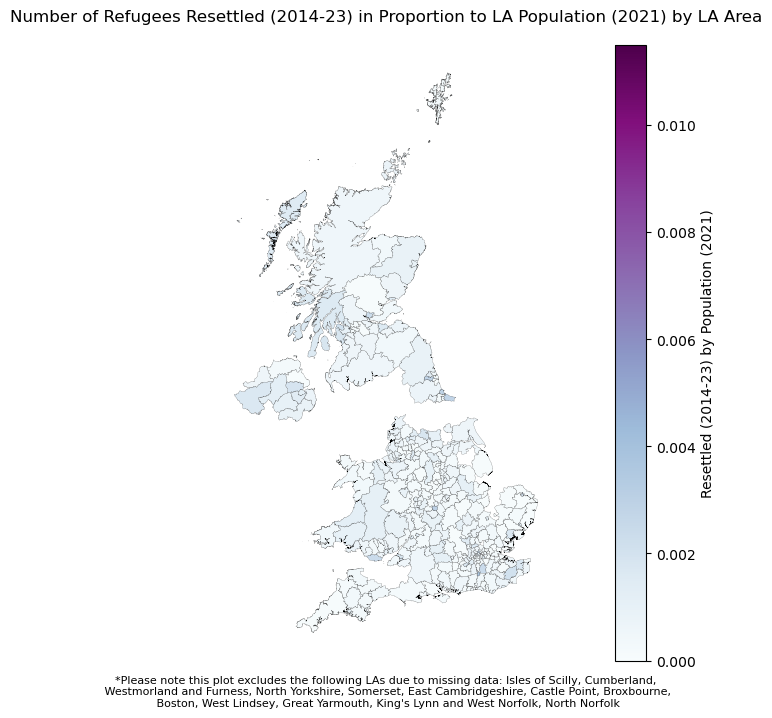

In [26]:
f,ax = plt.subplots(1, figsize=(16,8))

resettled.plot('BY_POP', legend=True, legend_kwds={'label': "Resettled (2014-23) by Population (2021)"}, ax=ax, edgecolor="black", cmap='BuPu', linewidth=0.1)

ax.set_axis_off()
ax.set_title('Number of Refugees Resettled (2014-23) in Proportion to LA Population (2021) by LA Area')

plt.text(0.5, -0.05, "*Please note this plot excludes the following LAs due to missing data: Isles of Scilly, Cumberland,\n Westmorland and Furness, North Yorkshire, Somerset, East Cambridgeshire, Castle Point, Broxbourne,\n Boston, West Lindsey, Great Yarmouth, King's Lynn and West Norfolk, North Norfolk"
         , ha='center', va='center', transform=plt.gca().transAxes, fontsize=8, wrap=True)

plt.show()

Almost there. However, the scale of my chorolpleth looks off. It appears that one or a few extreme values might be throwing off the scale. Let's check how many LAs actually have a 'BY_POP' value above 0.01, 0.008, 0.006, 0.003 and 0.000.

In [27]:
resettled.loc[resettled['BY_POP']>0.01]

,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LA,RESETTLED,LA_POP,BY_POP
263,E09000001,City of London,None,532381,181359,-0.09353,51.5157,5f0a227e-1cd7-407f-9dd8-9146ffa5e010,"MULTIPOLYGON (((531664.450 180555.150, 531664....",City of London,99.0,8618.0,0.0115


In [28]:
resettled.loc[resettled['BY_POP']>0.008]

,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LA,RESETTLED,LA_POP,BY_POP
263,E09000001,City of London,None,532381,181359,-0.09353,51.5157,5f0a227e-1cd7-407f-9dd8-9146ffa5e010,"MULTIPOLYGON (((531664.450 180555.150, 531664....",City of London,99.0,8618.0,0.0115


In [29]:
resettled.loc[resettled['BY_POP']>0.006]

,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LA,RESETTLED,LA_POP,BY_POP
263,E09000001,City of London,None,532381,181359,-0.09353,51.5157,5f0a227e-1cd7-407f-9dd8-9146ffa5e010,"MULTIPOLYGON (((531664.450 180555.150, 531664....",City of London,99.0,8618.0,0.0115


In [30]:
resettled.loc[resettled['BY_POP']>0.003]

,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LA,RESETTLED,LA_POP,BY_POP
211,E07000226,Crawley,None,526390,137581,-0.19533,51.1236,6d55b5f5-6081-4368-8429-ec315f287441,"POLYGON ((527526.302 142467.198, 527574.099 14...",Crawley,456.0,118580.0,0.0038
263,E09000001,City of London,None,532381,181359,-0.09353,51.5157,5f0a227e-1cd7-407f-9dd8-9146ffa5e010,"MULTIPOLYGON (((531664.450 180555.150, 531664....",City of London,99.0,8618.0,0.0115


In [31]:
resettled.loc[resettled['BY_POP']>0.000]

,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LA,RESETTLED,LA_POP,BY_POP
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,96097790-e4d1-4200-8ce7-17de53d58fca,"MULTIPOLYGON (((450154.599 525938.201, 450140....",Hartlepool,271.0,92571.0,0.0029
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,43ccae4f-588f-4f71-b28f-905ae3e9426a,"MULTIPOLYGON (((446854.700 517192.700, 446854....",Middlesbrough,83.0,143734.0,0.0006
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,c215a44f-108d-4394-bb75-b3ffc6c6e9d1,"MULTIPOLYGON (((451747.397 520561.100, 451792....",Redcar and Cleveland,388.0,136616.0,0.0028
3,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.5569,068e44f0-67d0-4abe-bd0b-db83d71967c0,"MULTIPOLYGON (((447177.704 517811.797, 447176....",Stockton-on-Tees,55.0,197030.0,0.0003
4,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,d70fe212-e702-4186-a861-e4d9f80395f8,"POLYGON ((423496.602 524724.299, 423497.204 52...",Darlington,75.0,108222.0,0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,08f041aa-c174-419e-9281-17dde767553b,"POLYGON ((323898.201 211287.499, 324115.698 21...",NaN,43.0,92453.0,0.0005
357,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,067e4dc5-903a-4c0a-9608-1d0e06da3913,"MULTIPOLYGON (((345897.698 180999.599, 345884....",NaN,54.0,93194.0,0.0006
358,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,59ef2ec1-2ef5-4b1d-a8b6-1c196fc00cf9,"MULTIPOLYGON (((334186.001 192669.398, 334201....",NaN,139.0,159658.0,0.0009
359,W06000023,Powys,Powys,302329,273255,-3.43531,52.3486,8edab03d-3bdd-4919-8e85-099662028239,"MULTIPOLYGON (((270499.000 297829.350, 270658....",NaN,149.0,133557.0,0.0011


From this exploration, it seems like the small LA 'City of London' is skewing the scale. The next highest 'BY_POP' value in the dataset is Crawley at only 0.0038. To enable differentiation between LAs on the chart, I will exclude City of London by setting the vmax argument at 0.003.

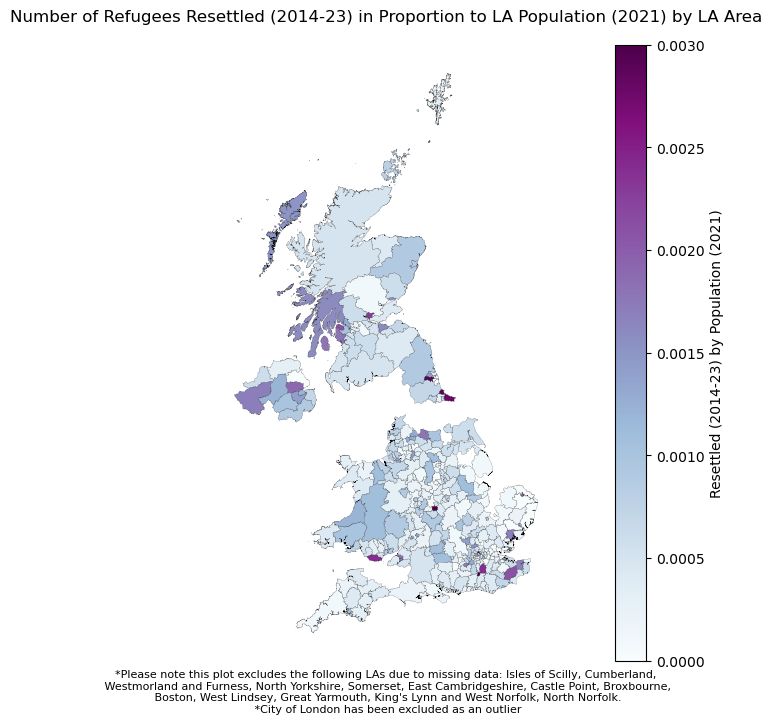

In [32]:
f,ax = plt.subplots(1, figsize=(16,8))

resettled.plot('BY_POP', legend=True, legend_kwds={'label': "Resettled (2014-23) by Population (2021)"}, ax=ax, edgecolor="black", cmap='BuPu', linewidth=0.1, vmax=0.003)

ax.set_axis_off()
ax.set_title('Number of Refugees Resettled (2014-23) in Proportion to LA Population (2021) by LA Area')

plt.text(0.5, -0.05, "*Please note this plot excludes the following LAs due to missing data: Isles of Scilly, Cumberland,\n Westmorland and Furness, North Yorkshire, Somerset, East Cambridgeshire, Castle Point, Broxbourne,\n Boston, West Lindsey, Great Yarmouth, King's Lynn and West Norfolk, North Norfolk.\n *City of London has been excluded as an outlier"
         , ha='center', va='center', transform=plt.gca().transAxes, fontsize=8, wrap=True)

plt.show()

To finish off my spatial visualisation, I will use the subplots method to plot my two graphs of the UK side by side, allowing the user to take in the information from both sides separately and also to compare between them. I place the total count graph to the left to hint that this tells a story with data. I.e., we start from the left looking at the face of total resettled by LA, but then consider a more naunced picture by taking into account the estimated population size of each LA. To make the subplots fit well next to eachother, I have customised the title size.

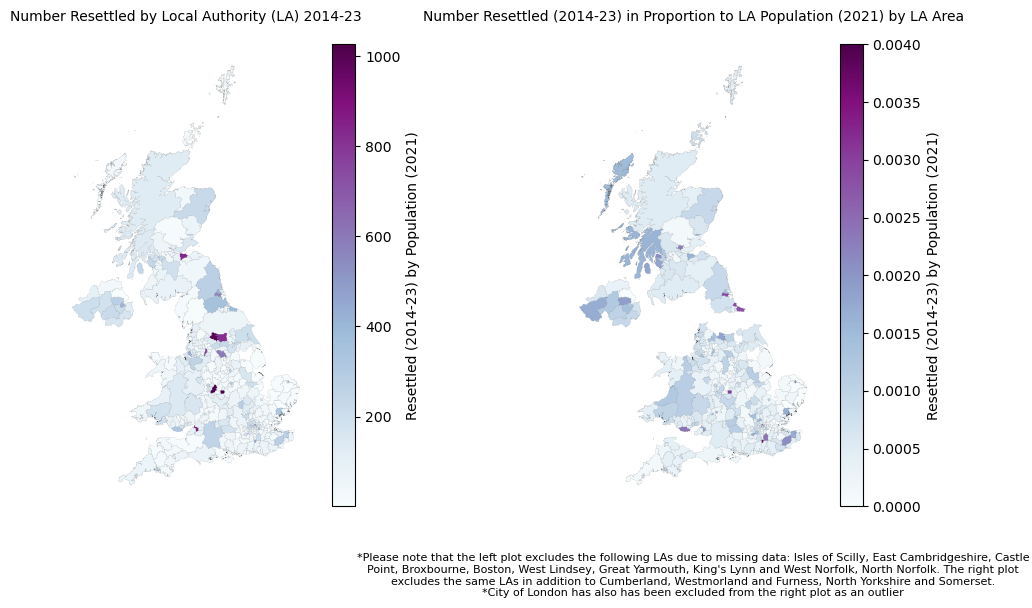

In [45]:
f,ax = plt.subplots(1,2, figsize=(12,6))

resettled.plot(ax=ax[1], column ='BY_POP', legend=True, legend_kwds={'label': "Resettled (2014-23) by Population (2021)"}, edgecolor="black", cmap='BuPu', linewidth=0.03, vmax=0.004)

resettled.plot(ax=ax[0], column ='RESETTLED', legend=True, legend_kwds={'label': "Resettled (2014-23) by Population (2021)"}, edgecolor="black", cmap='BuPu', linewidth=0.03)

# give subplot 1 an informative title
ax[1].set_title('Number Resettled (2014-23) in Proportion to LA Population (2021) by LA Area')
ax[1].title.set_size(10)
# give subplot 2 an informative title
ax[0].set_title('Number Resettled by Local Authority (LA) 2014-23')
ax[0].title.set_size(10)
# make axis invisible for subplot 1
ax[0].set_axis_off()
# make axis invisible for subplot 2
ax[1].set_axis_off()

plt.text(0.5, -0.15, "*Please note that the left plot excludes the following LAs due to missing data: Isles of Scilly, East Cambridgeshire, Castle Point, Broxbourne, Boston, West Lindsey, Great Yarmouth, King's Lynn and West Norfolk, North Norfolk. The right plot excludes the same LAs in addition to Cumberland, Westmorland and Furness, North Yorkshire and Somerset.\n*City of London has also has been excluded from the right plot as an outlier"
         , ha='center', va='center', transform=plt.gca().transAxes, fontsize=8, wrap=True)

plt.show()

# Final Data Visualisations

### Visualisation #1 - Non-spatial Visualisation of Vacant Dwellings in 2023 by LA

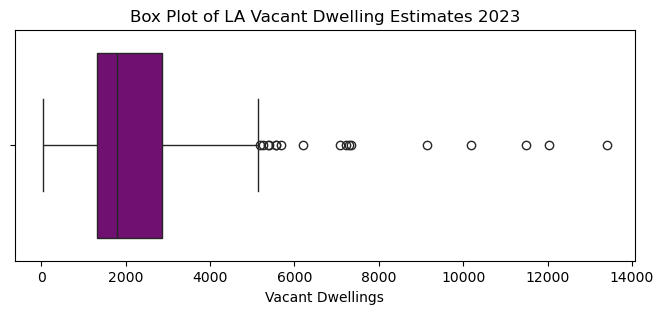

In [46]:
plt.figure(figsize=(8,3))
sns.boxplot(x='All_vacants', color='purple', data=vacancies).set(title='Box Plot of LA Vacant Dwelling Estimates 2023', xlabel='Vacant Dwellings');

plt.show()

My first visualisation presents the distribution of vacant dwelling stock across UK local authorities. We can see that the stock of vacant dwellings varies quite considerably across LAs, with one LA having nearly 14,000 vacant dwellings as of 2023 and some not having any at present. The chart uses a descriptive title and x asis and demonstrates its key insight that the median vacant dwelling stock for an LA is around 2,000. Local Authorities will be able to use this visualisation to inform their thinking and discussion regarding their capacity to accommodate refugees and their capacity relative to other LAs.

### Visualisation #2 - Spatial Visualisation of Refugees Resettled by LA and as Proportion of LA Population

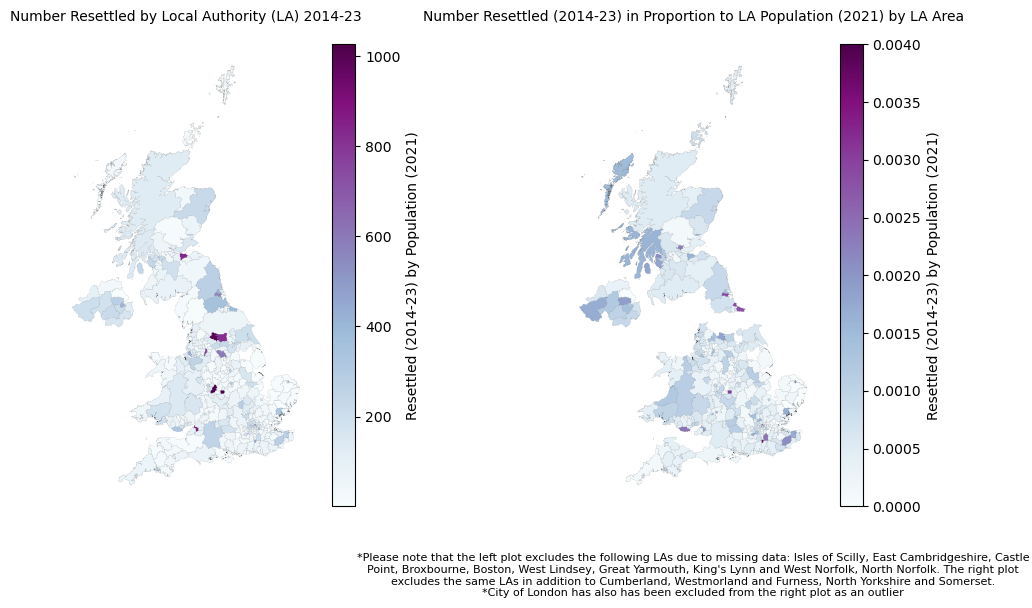

In [48]:
f,ax = plt.subplots(1,2, figsize=(12,6))

resettled.plot(ax=ax[1], column ='BY_POP', legend=True, legend_kwds={'label': "Resettled (2014-23) by Population (2021)"}, edgecolor="black", cmap='BuPu', linewidth=0.03, vmax=0.004)

resettled.plot(ax=ax[0], column ='RESETTLED', legend=True, legend_kwds={'label': "Resettled (2014-23) by Population (2021)"}, edgecolor="black", cmap='BuPu', linewidth=0.03)

# give subplot 1 an informative title
ax[1].set_title('Number Resettled (2014-23) in Proportion to LA Population (2021) by LA Area')
ax[1].title.set_size(10)
# give subplot 2 an informative title
ax[0].set_title('Number Resettled by Local Authority (LA) 2014-23')
ax[0].title.set_size(10)
# make axis invisible for subplot 1
ax[0].set_axis_off()
# make axis invisible for subplot 2
ax[1].set_axis_off()

plt.text(0.5, -0.15, "*Please note that the left plot excludes the following LAs due to missing data: Isles of Scilly, East Cambridgeshire, Castle Point, Broxbourne, Boston, West Lindsey, Great Yarmouth, King's Lynn and West Norfolk, North Norfolk. The right plot excludes the same LAs in addition to Cumberland, Westmorland and Furness, North Yorkshire and Somerset.\n*City of London has also has been excluded from the right plot as an outlier"
         , ha='center', va='center', transform=plt.gca().transAxes, fontsize=8, wrap=True)

plt.show()

My second plot allows Home Office Policy staff, LAs, NGOs and the general public to quickly get a visual sense of the number of refugees resettled since 2014 across each LA area in the UK. As might have been expected, we can see that some of the larger cities in the UK - namely Leeds, Bradford, Edinburgh, Bristol, Sheffield and Birmingham - appear to have resettled the highest numbers of refugees since 2014. Although none have resettled more than 1,000 refugees. However, turning to the second element of my visualisation, we can see that although these cities have recorded the highest numbers, as a proportion of their estimated populations, they were not the highest resettlers. Those that emerge when considering estimated population include smaller, somewhat more rural local authorities such as Redcar, Hartlepool, Gateshead, Canterbury, Ashford, Tanbridge, Clackmanshire, Coventry.

The chart is plotted in purple - a colour often associated with Home Office' branded outputs. This colour is not only reflective of the output preferences and expectations of my target audience (Home Office Policy colleagues and LAs), it is also a colour that is less associated with negative or postive value judgement such as red or green. The resettlement of refugees in the UK at present is a polarised topic and policy decision made in this area often have important consequences for many vulnerable people. Additionally, Civil Service analysis is rightly expected to be impartial. For all these reasons, I must be careful not to suggest that I am making undue value judgements concerning this controversial topic by, for example, characterising the resettlement of refugees in the UK as a threat by using red.

## References
<p><a href="https://assets.publishing.service.gov.uk/media/65671c8d312f40000de5d57f/LT_615.ods">[1]</a> Vacant UK Dwelling Stock by Local Authority 2023 </p>

<p><a href="https://assets.publishing.service.gov.uk/media/655bae44d03a8d001207fd17/resettlement-local-authority-datasets-sep-2023.xlsx">[2]</a> UK Home Office Immigration System Statistics Data Table - Resettlement by Local Authority 2023</p>

<p><a href="https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland/mid2021/ukpopestimatesmid2021on2021geographyfinal.xls">[3]</a> ONS Population Estimates by Local Authority 2021</p>

<p><a href="https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2023-boundaries-uk-bfc/explore?location=52.555783%2C-0.939244%2C6.65">[4]</a> ONS Open Geography Portal Local Authority District Boundaries 2023</p>

<p><a href="https://github.com/FrancescaPontin/GEOG5995">[5]</a> GEOG5995M course materials</p>
